### Visualization
- Encode all categorical data
- PCA data to 2 or 3 features so data can be visualized

In [1]:
import pandas as pd

In [2]:
columns = ['duration',
 'protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'label']

df = pd.read_csv('kddcup.data.gz', header=None, names=columns)
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


In [3]:
df.label = df.label.apply(lambda s: s.strip('.'))
df.label.value_counts()

smurf              2807886
neptune            1072017
normal              972781
satan                15892
ipsweep              12481
portsweep            10413
nmap                  2316
back                  2203
warezclient           1020
teardrop               979
pod                    264
guess_passwd            53
buffer_overflow         30
land                    21
warezmaster             20
imap                    12
rootkit                 10
loadmodule               9
ftp_write                8
multihop                 7
phf                      4
perl                     3
spy                      2
Name: label, dtype: int64

### OneHotEncoding

In [4]:
from sklearn import preprocessing

In [5]:
le = preprocessing.LabelEncoder()

In [6]:
ohe = preprocessing.OneHotEncoder()

In [7]:
# 3 categorical features

df[['protocol_type', 'service', 'flag']].head()

,protocol_type,service,flag
0,tcp,http,SF
1,tcp,http,SF
2,tcp,http,SF
3,tcp,http,SF
4,tcp,http,SF


In [8]:
le_data = df[['protocol_type', 'service', 'flag']].apply(le.fit_transform)

In [9]:
le_data.head()

,protocol_type,service,flag
0,1,24,9
1,1,24,9
2,1,24,9
3,1,24,9
4,1,24,9


In [10]:
ohe.fit(le_data)

OneHotEncoder(categorical_features='all', dtype=<type 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=True)

In [11]:
ohe_data = ohe.transform(le_data).toarray()

In [12]:
type(ohe_data)

numpy.ndarray

In [13]:
ohe_data.shape

(4898431L, 84L)

In [14]:
ohe_data_df = pd.DataFrame(ohe_data)

In [15]:
ohe_data_df.shape

(4898431, 84)

In [16]:
ohe_data_df.head()

,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,80,81,82,83
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [17]:
# there are 5 features also having values either 0 or 1, combine them together

temp = df[['land', 'logged_in', 'root_shell', 'is_host_login', 'is_guest_login']]
temp = ohe_data_df.join(temp)
temp.shape

(4898431, 89)

### PCA

In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [19]:
pca = PCA(n_components=10)

In [20]:
temp_transformed = pca.fit_transform(temp)

In [22]:
import numpy as np

def print_var(pca):
    print np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
    
print_var(pca)

[ 60.92  82.75  88.02  92.67  94.85  96.42  97.22  97.89  98.25  98.51]


In [23]:
temp_transformed

array([[ 0.82302007,  1.3975204 , -0.15713766, ..., -0.00585068,
        -0.00450463,  0.02132401],
       [ 0.82302007,  1.3975204 , -0.15713767, ..., -0.00585068,
        -0.00450463,  0.02132401],
       [ 0.82302007,  1.3975204 , -0.15713767, ..., -0.00585068,
        -0.00450462,  0.02132401],
       ..., 
       [ 0.82302007,  1.3975204 , -0.15713767, ..., -0.00585068,
        -0.00450463,  0.02132401],
       [ 0.82302007,  1.3975204 , -0.15713767, ..., -0.00585068,
        -0.00450463,  0.02132401],
       [ 0.82302007,  1.3975204 , -0.15713767, ..., -0.00585068,
        -0.00450463,  0.02132401]])

In [24]:
temp_transformed_df = pd.DataFrame(temp_transformed)
temp_transformed_df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.82302,1.39752,-0.157138,-0.024013,-0.152439,-0.068871,0.013618,-0.005851,-0.004505,0.021324
1,0.82302,1.39752,-0.157138,-0.024013,-0.152439,-0.068871,0.013618,-0.005851,-0.004505,0.021324
2,0.82302,1.39752,-0.157138,-0.024013,-0.152439,-0.068871,0.013618,-0.005851,-0.004505,0.021324
3,0.82302,1.39752,-0.157138,-0.024013,-0.152439,-0.068871,0.013618,-0.005851,-0.004505,0.021324
4,0.82302,1.39752,-0.157138,-0.024013,-0.152439,-0.068871,0.013618,-0.005851,-0.004505,0.021324


In [25]:
X = df.drop(['label', 'protocol_type', 'service', 'flag', 'land', 'logged_in', 'root_shell', 'is_host_login', 'is_guest_login'], axis=1)\
      .join(temp_transformed_df)

In [26]:
X.head()

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,su_attempted,num_root,...,0,1,2,3,4,5,6,7,8,9
0,0,215,45076,0,0,0,0,0,0,0,...,0.82302,1.39752,-0.157138,-0.024013,-0.152439,-0.068871,0.013618,-0.005851,-0.004505,0.021324
1,0,162,4528,0,0,0,0,0,0,0,...,0.82302,1.39752,-0.157138,-0.024013,-0.152439,-0.068871,0.013618,-0.005851,-0.004505,0.021324
2,0,236,1228,0,0,0,0,0,0,0,...,0.82302,1.39752,-0.157138,-0.024013,-0.152439,-0.068871,0.013618,-0.005851,-0.004505,0.021324
3,0,233,2032,0,0,0,0,0,0,0,...,0.82302,1.39752,-0.157138,-0.024013,-0.152439,-0.068871,0.013618,-0.005851,-0.004505,0.021324
4,0,239,486,0,0,0,0,0,0,0,...,0.82302,1.39752,-0.157138,-0.024013,-0.152439,-0.068871,0.013618,-0.005851,-0.004505,0.021324


In [27]:
X = scale(X, with_mean=False, with_std=True)

In [28]:
pca_2 = PCA(n_components=2)

In [29]:
X_2 = pca_2.fit_transform(X)

In [30]:
print_var(pca_2)

[ 21.56  34.58]


In [31]:
pca_3 = PCA(n_components=3)
X_3 = pca_3.fit_transform(X)
print_var(pca_3)

[ 21.56  34.58  42.56]


### 2D Visualization

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [33]:
pcaDf = pd.DataFrame(data=X_2, columns=['A', 'B']).join(df.label)
pcaDf.head()

,A,B,label
0,1.239731,0.799290,normal
1,-0.098642,0.713640,normal
2,0.181654,0.758059,normal
3,0.272145,0.770902,normal
4,0.311998,0.775513,normal


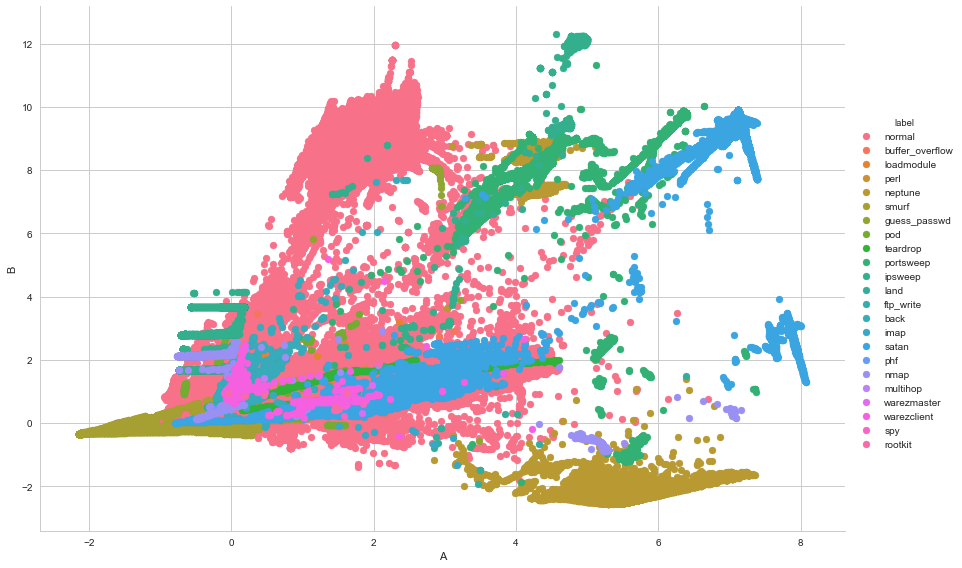

In [35]:
sns.set_style("whitegrid")
fig = sns.FacetGrid(data=pcaDf, hue='label', aspect=1.5, size=8)
fig.map(plt.scatter, 'A', 'B').add_legend()

### 3D Visualization

In [36]:
pcaDf_3d = pd.DataFrame(data=X_3, columns=['A', 'B', 'C']).join(df.label)
pcaDf_3d.head()

,A,B,C,label
0,1.239731,0.799295,3.820249,normal
1,-0.098642,0.713645,3.540378,normal
2,0.181653,0.758064,3.782153,normal
3,0.272145,0.770907,3.856436,normal
4,0.311997,0.775519,3.886619,normal


In [37]:
from mpl_toolkits.mplot3d import Axes3D

In [39]:
labels = list(pcaDf_3d.label.unique())
labels_nums = {k:v for k, v in zip(labels, range(0, len(labels)))}
color = pcaDf_3d.label.map(labels_nums)

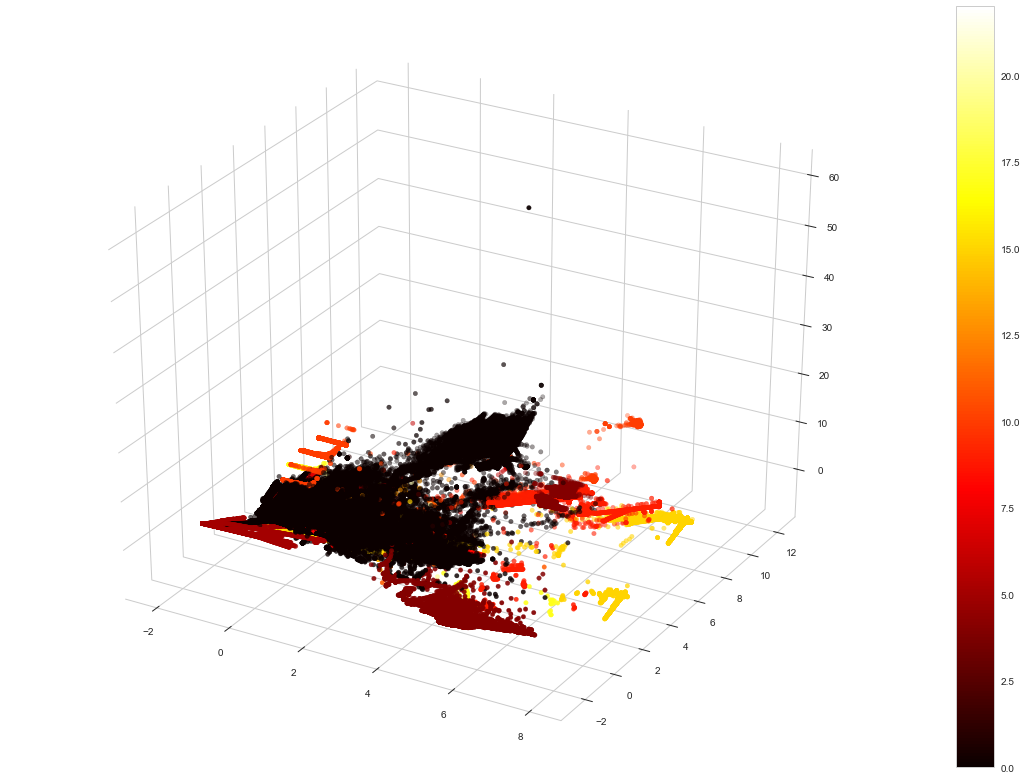

In [47]:
fig = plt.figure(figsize=(20, 14))
ax = fig.add_subplot(111, projection='3d')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
#ax.set_xlim3d(-5, 10)
#ax.set_ylim3d(-5, 15)
#ax.set_zlim3d(-10, 70)
p = ax.scatter(pcaDf_3d.A, pcaDf_3d.B, pcaDf_3d.C, marker='o', c=color, cmap='hot', s=20)
fig.colorbar(p)

In [40]:
pcaDf_3d.describe()

,A,B,C
count,4.898431e+06,4.898431e+06,4.898431e+06
mean,8.872330e-12,-1.437887e-12,2.322233e-11
std,3.009460e+00,2.338573e+00,1.830537e+00
min,-2.132775e+00,-2.551699e+00,-5.399313e+00
25%,-2.132775e+00,-3.368067e-01,-8.071421e-01
50%,-2.130708e+00,-3.368067e-01,-8.071421e-01
75%,1.461410e+00,-1.464903e-01,-2.903698e-01
max,8.070105e+00,1.231589e+01,6.022037e+01


In [46]:
# label to number color map

print sorted(labels_nums.items(), key=lambda x: x[1])

[('normal', 0), ('buffer_overflow', 1), ('loadmodule', 2), ('perl', 3), ('neptune', 4), ('smurf', 5), ('guess_passwd', 6), ('pod', 7), ('teardrop', 8), ('portsweep', 9), ('ipsweep', 10), ('land', 11), ('ftp_write', 12), ('back', 13), ('imap', 14), ('satan', 15), ('phf', 16), ('nmap', 17), ('multihop', 18), ('warezmaster', 19), ('warezclient', 20), ('spy', 21), ('rootkit', 22)]
